In [185]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
%matplotlib inline

# Обработка видео
Классификация действий по видео

In [186]:
from PIL import Image
def getframes(filename):
    video_1 = cv2.VideoCapture(filename)
    frames = []
    n=0
    while (video_1.isOpened()):
        ret, frame = video_1.read()
        if n>1000:
            frame = Image.fromarray(frame[:,:,1])
            frame = frame.resize( (32, 32) )
            frame = np.array(frame).reshape( (32, 32, 1) )
            frames.append(frame.astype(np.float32)/255.)
        n+=1
        if n>1100:
            break
    return np.array(frames)



In [187]:
frames_lecture = getframes('7.mp4')

In [188]:
frames_practice = getframes('Practice_7.mp4')

In [189]:
lecture_lables = np.zeros(len(frames_lecture)).astype(np.int32)
practice_lables = np.ones(len(frames_lecture)).astype(np.int32)

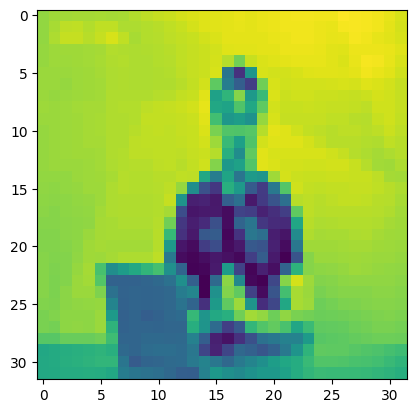

In [190]:

plt.imshow(frames_lecture[1])

In [191]:
print(frames_lecture.shape, frames_lecture.dtype)

(100, 32, 32, 1) float32


In [192]:
print(lecture_lables.shape, lecture_lables.dtype) 

(100,) int32


In [193]:
x = np.concatenate((frames_lecture, frames_practice), axis=0)

In [194]:
x.shape

(200, 32, 32, 1)

In [195]:
y = np.concatenate((lecture_lables, practice_lables), axis=0)

In [196]:
y[120]

1

In [208]:
#Формируем датасет
dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(x),
                               tf.data.Dataset.from_tensor_slices(y)))

In [209]:
dataset= dataset.shuffle(len(dataset))

In [210]:
#Размер train выборки
train_size = int(0.7*len(dataset))
print(train_size)
#Делим на train и test
train_dataset = dataset.take(train_size).cache()
test_dataset = dataset.skip(train_size).take(len(dataset) - train_size).cache()

140


In [211]:
BATCH_SIZE = 16
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

tf.Tensor([0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0], shape=(16,), dtype=int32)
(16, 32, 32, 1)


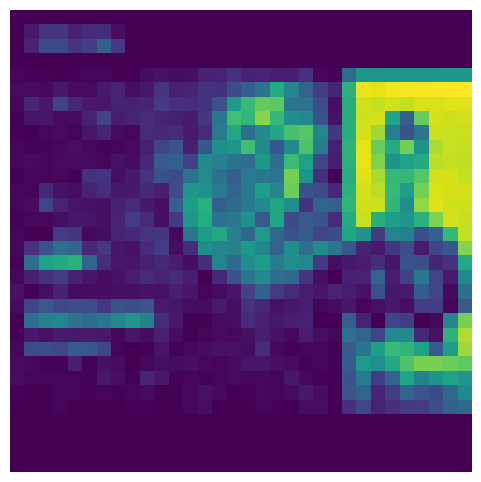

In [212]:
plt.figure(figsize=(6,6))
for im, lable in train_dataset.take(1):
    print(lable) 
    print(im.shape)
    plt.imshow((im[0]*255).numpy().astype("uint8"))
    plt.axis("off")
    break


In [213]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation=None)
])

In [214]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mse',#'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [215]:
NUM_EPOCHS = 5
#model.fit(x, y, epochs=NUM_EPOCHS)
model.fit(train_dataset, epochs=NUM_EPOCHS)

Epoch 1/5
9/9 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.4571
Epoch 2/5
9/9 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.6857
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000


In [216]:
predict = model.predict(test_dataset)

4/4 [==============================] - 0s 1ms/step


In [218]:
plt.figure(figsize=(6,6))
for im, lable in test_dataset.take(1):
  
    for i in range(BATCH_SIZE):
        print(predict[i][0], lable[i].numpy()  )


-0.04386731 0
-0.08195928 0
-0.08041845 0
0.97414404 1
0.97414404 1
0.97414404 1
0.97414404 1
0.97414404 1
-0.07633731 0
0.97414404 1
-0.06646685 0
0.97414404 1
-0.04236376 0
-0.07619245 0
0.97414404 1
-0.07317126 0


<Figure size 600x600 with 0 Axes>